In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set_style("darkgrid")

In [3]:
path = "diabetes_prediction_dataset (2).csv"
dataset = pd.read_csv(path)
dataset.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
dataset['age'] = dataset['age'].astype(int)
dataset['blood_glucose_level'] =  dataset['blood_glucose_level'].astype(float)

In [7]:
dataset['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [8]:
dataset['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
dataset = dataset.drop(columns = 'smoking_history')

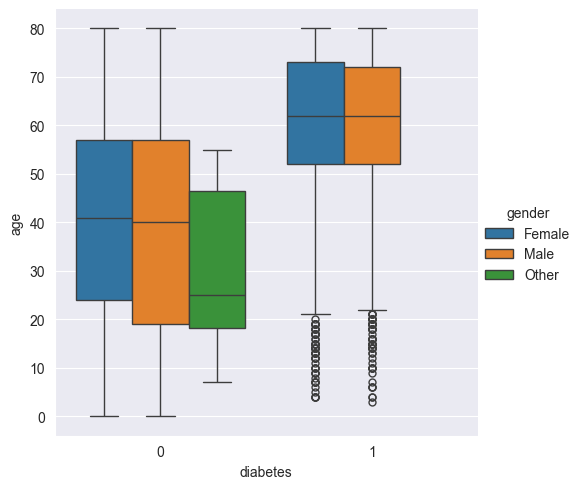

In [10]:
sns.catplot(data = dataset, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

c:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


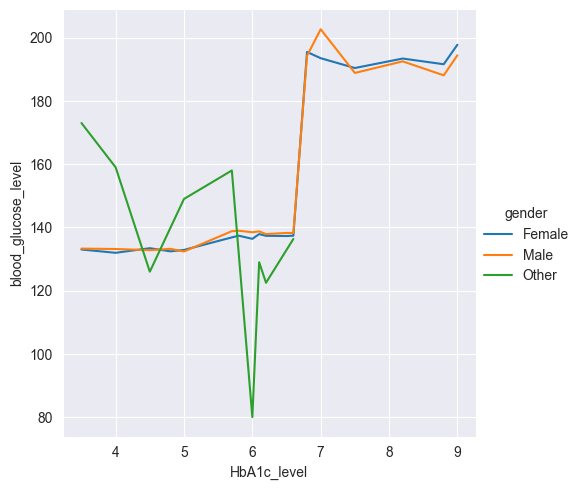

In [11]:
sns.relplot(data = dataset, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

In [12]:
trans = dataset.loc[dataset['gender'] == "Other"]
trans

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10,0,0,14.09,5.0,140.0,0
14838,Other,19,0,0,27.32,5.7,158.0,0
16702,Other,39,0,0,31.24,6.2,85.0,0
18691,Other,10,0,0,16.59,6.1,160.0,0
23266,Other,23,0,0,24.23,6.1,140.0,0
31985,Other,53,0,0,27.32,6.6,160.0,0
33805,Other,45,0,0,27.32,4.0,159.0,0
34929,Other,47,0,0,36.76,6.6,90.0,0
35006,Other,47,0,0,36.76,3.5,200.0,0
40337,Other,18,0,0,30.19,6.1,90.0,0


In [13]:
trans.index

Index([12669, 14838, 16702, 18691, 23266, 31985, 33805, 34929, 35006, 40337,
       56238, 66595, 66887, 67204, 68484, 71139, 75302, 75734],
      dtype='int64')

In [14]:
d2 = dataset.drop(index = trans.index, axis = 'index')
d2

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.19,6.6,140.0,0
1,Female,54,0,0,27.32,6.6,80.0,0
2,Male,28,0,0,27.32,5.7,158.0,0
3,Female,36,0,0,23.45,5.0,155.0,0
4,Male,76,1,1,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,27.32,6.2,90.0,0
99996,Female,2,0,0,17.37,6.5,100.0,0
99997,Male,66,0,0,27.83,5.7,155.0,0
99998,Female,24,0,0,35.42,4.0,100.0,0


In [15]:
d2['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [16]:
d2.dtypes

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object

In [17]:
X = d2.iloc[:,[1,2,3,4,5,6]]
y = d2.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
results = []

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')
    ]

cm = confusion_matrix(y_pred, y_test)
print("Accuracy score: ", accuracy_score(y_pred,y_test)*100)
print("\n\n\n", cm, "\n\n\n")
print(results)



Accuracy score:  96.07137141942711



 [[22654   782]
 [  200  1360]] 



[0.9607137141942711, 0.9585055401766722, 0.9607137141942711, 0.9578725416384449]


c:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
ypredclass = clf.predict_proba(X_test)
ypredclass

array([[9.68536432e-01, 3.14635682e-02],
       [9.97352339e-01, 2.64766132e-03],
       [9.99700736e-01, 2.99264232e-04],
       ...,
       [9.99839825e-01, 1.60175405e-04],
       [9.99985426e-01, 1.45738052e-05],
       [9.99937779e-01, 6.22214973e-05]])

In [22]:
max_prob = np.max(ypredclass, axis=1)

# Get the index of the class with the maximum probability
max_index = np.argmax(ypredclass, axis=1)

# Round the maximum probability to 3 decimal places
max_prob = np.round(max_prob, 3)

# Make DataFrame
prob_matrix = pd.DataFrame({
    'class_index': max_index,
    'probability': max_prob
})

# Print the maximum probability
prob_matrix

,class_index,probability
0,0,0.969
1,0,0.997
2,0,1.000
3,0,1.000
4,0,0.981
...,...,...
24991,0,1.000
24992,0,1.000
24993,0,1.000
24994,0,1.000


In [23]:
prob_matrix.loc[prob_matrix['class_index'] == 1]


,class_index,probability
15,1,0.796
21,1,0.666
37,1,0.973
109,1,0.789
128,1,0.645
...,...,...
24938,1,0.580
24949,1,0.942
24971,1,0.761
24972,1,0.986


In [24]:
X_train.dtypes


age                      int32
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
dtype: object

In [25]:
import pickle

with open("classifier.pkl", 'wb') as f:
    pickle.dump(clf, f)